# Visualise the node & edge predictions & perform dimensionality reduction:

In [15]:
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import torch
from sklearn.manifold import TSNE


In [16]:
from grace.base import GraphAttrs
from grace.io.image_dataset import ImageGraphDataset
from grace.models.feature_extractor import FeatureExtractor

from grace.evaluation.process import assume_dummy_predictions_from_annotations
from grace.evaluation.dim_reduction import TSNEDimensionalityReduction
from grace.evaluation.visualisation import (
    read_patch_stack_by_label, 
    montage_from_image_patches,
    overlay_from_image_patches,
)


### Load the train & test example images:

In [17]:
grace_path = Path("/Users/kulicna/Desktop/dataset/shape_stars/train")
grace_path.is_dir()

True

### Load the ResNet-152 to transform the data:

In [18]:
patch_size = (224, 224)
feature_extractor = torch.load("/Users/kulicna/Desktop/classifier/extractor/resnet152.pt")
feature_extractor = FeatureExtractor(model=feature_extractor, bbox_size=patch_size)


In [19]:
image_graph_dataset = ImageGraphDataset(
    image_dir=grace_path,
    grace_dir=grace_path,
    transform=feature_extractor,
    keep_node_unknown_labels=True,
    keep_edge_unknown_labels=True,
)

In [20]:
image, target = image_graph_dataset[1]
graph = target['graph']

09/11/2023 06:46:10 PM MRC_Synthetic_File_001
09/11/2023 06:46:10 PM Nodes count | [56, 84, 38] x | [31.46, 47.19, 21.35] %
09/11/2023 06:46:10 PM Edges count | [204, 100, 211] x | [39.61, 19.42, 40.97] %
/Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


### Visualise:

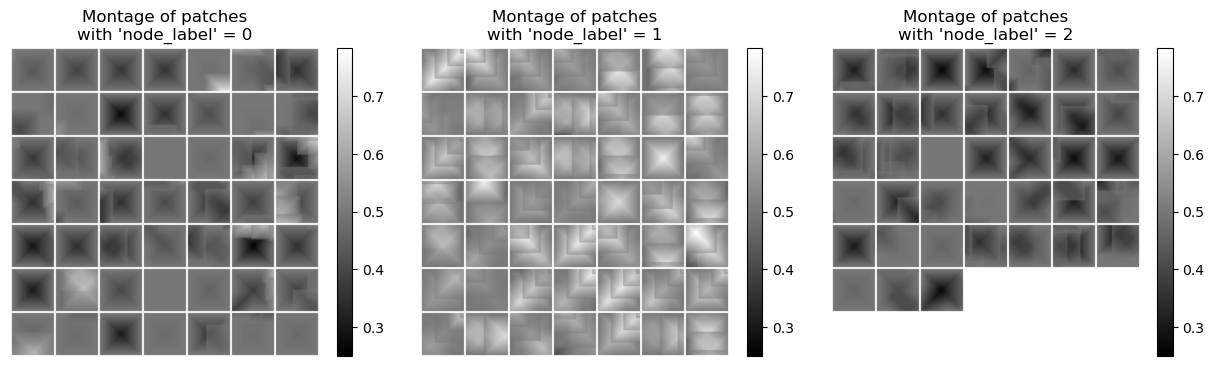

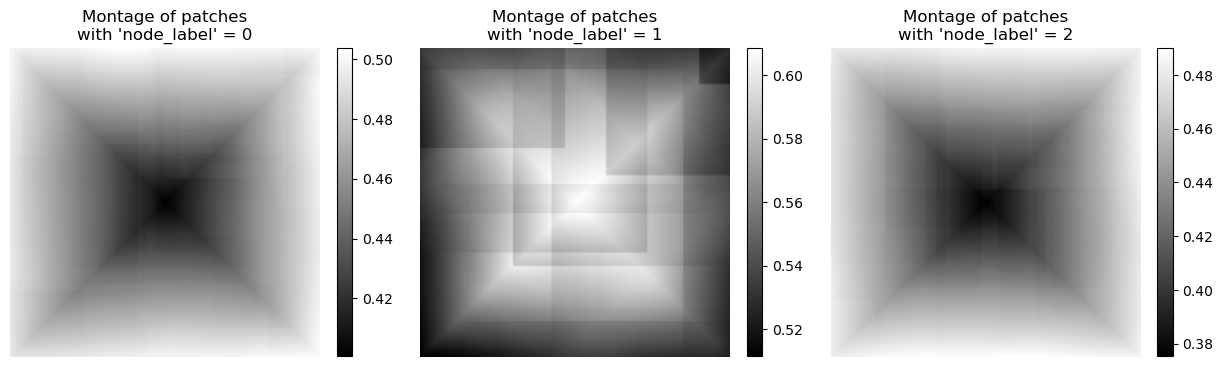

In [21]:
crops = read_patch_stack_by_label(G=graph, image=image, crop_shape=patch_size)
montage_from_image_patches(crops)
overlay_from_image_patches(crops)

### Define the functions to perform the TSNE:

In [22]:
# def read_graph_pred_and_true_labels(G: nx.Graph) -> tuple[npt.NDArray, npt.NDArray]:

#     node_GT_label = []
#     node_features = []

#     for _, node in G.nodes(data=True):
#         node_GT_label.append(node[GraphAttrs.NODE_GROUND_TRUTH].value)
#         node_features.append(node[GraphAttrs.NODE_FEATURES].numpy())

#     return np.array(node_GT_label), np.array(node_features)
    

In [23]:
# def perform_and_plot_tsne(
#     node_GT_label: npt.NDArray, 
#     node_features: npt.NDArray, 
#     n_components: int = 2,
# ) -> None:
#     # Shapes must agree:
#     assert len(node_GT_label) == len(node_features)

#     node_embed = TSNE(n_components=n_components).fit_transform(X=node_features)
#     node_embed.shape

#     plt.figure(figsize=(5, 4))
#     umap1, umap2 = node_embed[:, 0], node_embed[:, 1]
#     plt.scatter(x=umap1, y=umap2, c=node_GT_label, cmap="coolwarm")
#     plt.colorbar()
#     plt.xlabel("UMAP 1")
#     plt.ylabel("UMAP 2")
#     plt.title("TSNE of patch features by GT label")
#     plt.show()
#     plt.close()


### Run:

In [24]:
# node_true, node_feat = read_graph_pred_and_true_labels(G=graph)
# perform_and_plot_tsne(node_true, node_feat)

### Nominate a model which has (and has no) GCN layers:

In [25]:
# def read_graph_dataset_IO(G: nx.Graph) -> tuple[torch.stack]:
    
#     # Prepare GT labels:
#     dataset_batches = dataset_from_graph(
#         graph=G, mode="whole", in_train_mode=False
#     )
#     dataset_batches = dataset_batches[0]
    
#     # Prepare the data:
#     node_labels = dataset_batches.y
#     node_embeds = dataset_batches.x
#     edge_indices = dataset_batches.edge_index

#     return node_labels, node_embeds, edge_indices
    

In [26]:
# def extract_GCN_node_embeddings(
#     G: nx.Graph,
#     model_filename: str = None, 
# ) -> torch.stack:

#     node_labels, node_embeds, edge_indices = read_graph_dataset_IO(G=G)
    
#     if model_filename is None:
#         logging.info(
#             "Warning, only returning the 'node_embeddings' as"
#             "no pre-trained GCN model was specified..."
#         )

#     else:        
#         # Log the classifier time-stamp name:
#         assert Path(model_filename).is_file()
#         name = Path(model_filename).parent.name
#         logging.info(f"Processing the model time-stamp: '{name}/classifier.py'")

#         # Load the model & drop the `Linear` layers:
#         full_gcn_classifier = torch.load(model_filename)
#         gcn_only_classifier = drop_linear_layers_from_model(full_gcn_classifier)
        
#         # If only `Linear` model, log the warning:
#         if len(gcn_only_classifier) < 1: 
#             logging.info(
#                 "Warning, only returning the 'node_embeddings' as"
#                 "the GCN contains no graph convolutional layers..."
#             )
            
#         # Get the GCN node embeddings:
#         else:
#             # Prep the model & modify embeddings in-place:
#             gcn_only_classifier.eval()
#             for module in gcn_only_classifier[0]:
#                 node_embeds = module(node_embeds, edge_indices)
            
#         # Log the shapes:
#         logging.info(
#             "Extracted 'node_embeddings' -> "
#             f"{node_embeds.shape}, {node_embeds.dtype}"
#         )
        
#     return node_labels, node_embeds
    

In [27]:
# class TSNEDimensionalityReduction(object):
    
#     def __init__(self, graph: nx.Graph, model: str | Path) -> None:
        
#         self.graph = graph
#         self.model = model
        
#         if self.model is not None:
#             self.model = Path(self.model)
#             assert self.model.is_file()

#     def read_graph_dataset_IO(self) -> tuple[torch.stack]:
    
#         # Prepare GT labels:
#         dataset_batches = dataset_from_graph(
#             graph=self.graph, mode="whole", in_train_mode=False
#         )
#         dataset_batches = dataset_batches[0]
        
#         # Prepare the data:
#         node_labels = dataset_batches.y
#         node_embeds = dataset_batches.x
#         edge_indices = dataset_batches.edge_index

#         return node_labels, node_embeds, edge_indices
    
#     def extract_GCN_node_embeddings(self) -> tuple[torch.stack]:
        
#         node_labels, node_embeds, edge_indices = self.read_graph_dataset_IO()

#         if self.model is None:
#             logging.info(
#                 "Warning, only returning the 'node_embeddings' as"
#                 "no pre-trained GCN model was specified..."
#             )

#         else:        
#             # Log the classifier time-stamp name:
#             name = self.model.parent.name
#             logging.info(f"Processing the model time-stamp: '{name}/classifier.py'")

#             # Load the model & drop the `Linear` layers:
#             full_gcn_classifier = torch.load(self.model)
#             gcn_only_classifier = drop_linear_layers_from_model(full_gcn_classifier)
            
#             # If only `Linear` model, log the warning:
#             if len(gcn_only_classifier) < 1: 
#                 logging.info(
#                     "Warning, only returning the 'node_embeddings' as"
#                     "the GCN contains no graph convolutional layers..."
#                 )
                
#             # Get the GCN node embeddings:
#             else:
#                 # Prep the model & modify embeddings in-place:
#                 gcn_only_classifier.eval()
#                 for module in gcn_only_classifier[0]:
#                     node_embeds = module(node_embeds, edge_indices)
                
#             # Log the shapes:
#             logging.info(
#                 "Extracted 'node_embeddings' -> "
#                 f"{node_embeds.shape}, {node_embeds.dtype}"
#             )
            
#         return node_labels, node_embeds
        
            
#     def perform_and_plot_tsne(
#         self, 
#         node_GT_label: npt.NDArray, 
#         node_features: npt.NDArray, 
#         *,
#         n_components: int = 2,
#         title: str = "",
#         ax: matplotlib.axes = None,
#     ) -> matplotlib.axes:
        
#         # Shapes must agree:
#         assert len(node_GT_label) == len(node_features)
#         tsne = TSNE(n_components=n_components)
#         node_embed = tsne.fit_transform(X=node_features)

#         # Plot the TSNE manifold:
#         title = f"TSNE of Patch Features\n{title}" 
#         umap1, umap2 = node_embed[:, 0], node_embed[:, 1]
#         scatter = ax.scatter(x=umap1, y=umap2, c=node_GT_label, cmap="coolwarm")
#         cbar = plt.colorbar(scatter)
#         cbar.ax.get_yaxis().labelpad = 15
#         cbar.ax.set_ylabel('Ground Truth Node Label', rotation=270)
#         ax.set_xlabel("UMAP 1")
#         ax.set_ylabel("UMAP 2")
#         ax.set_title(title)
#         return ax


#     def plot_TSNE_before_and_after_GCN(self, **kwargs) -> None:
        
#         # Plot the subplots:
#         size = 5
#         _, axes = plt.subplots(1, 2, figsize=(size*2+2, size*1))

#         # Get the embeddings:
#         for p, (plot_name, method) in enumerate(zip(["Before", "After"],
#             [self.read_graph_dataset_IO, self.extract_GCN_node_embeddings], 
#             )):
#             labels, embeds = method()[:2]
#             shape = embeds.shape[-1]
#             title = f"{plot_name} GCN | Node Feature Embedding [{shape}]"
#             self.perform_and_plot_tsne(labels, embeds, title=title, ax=axes[p], **kwargs)

#         # Annotate & display:
#         plt.tight_layout()
#         plt.show()
#         plt.close()
        

### Call the plotter:

09/11/2023 06:46:44 PM Processing the model time-stamp: '2023-09-08_15-11-58/classifier.py'
09/11/2023 06:46:44 PM Extracted 'node_embeddings' -> torch.Size([178, 16]), torch.float32


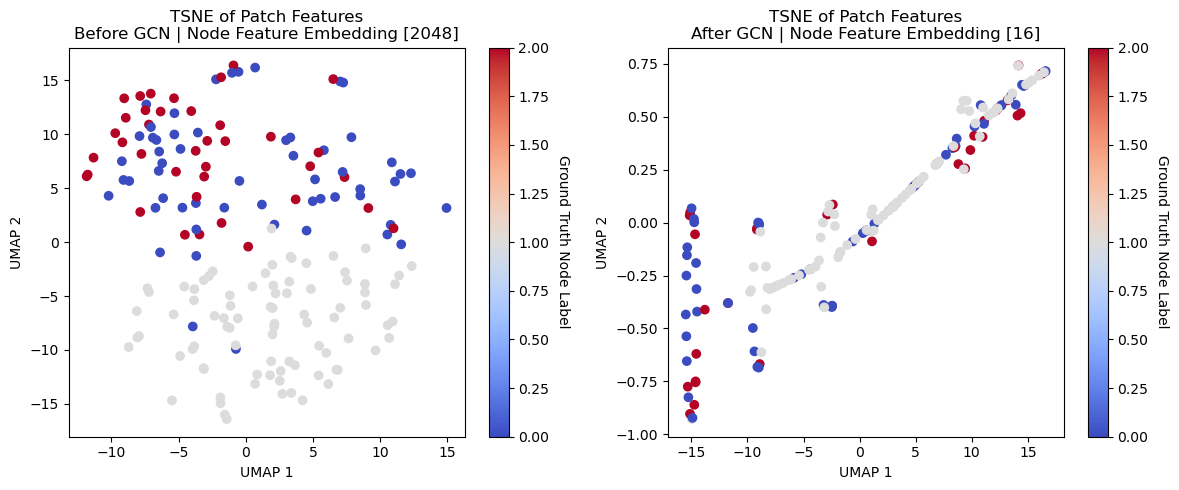

In [28]:
# classifier_filename = None
# classifier_filename = "/Users/kulicna/Desktop/classifier/runs/2023-09-07_17-30-51/classifier.pt"  # best Linear classifier
classifier_filename = "/Users/kulicna/Desktop/classifier/runs/2023-09-08_15-11-58/classifier.pt"  # bad GCN + Linear classifier

dim_red = TSNEDimensionalityReduction(graph=graph, model=classifier_filename)
dim_red.plot_TSNE_before_and_after_GCN()


##### Done!

In [ ]:
full_gcn_classifier = torch.load(classifier_filename)
full_gcn_classifier.eval()


In [ ]:
gcn_only_classifier = drop_linear_layers_from_model(full_gcn_classifier)
gcn_only_classifier, type(gcn_only_classifier)


In [ ]:
len(gcn_only_classifier)

In [ ]:
# node_GT_label = []
# node_features = []

# for idx, node in graph.nodes(data=True):
#     node_GT_label.append(node[GraphAttrs.NODE_GROUND_TRUTH].value)
#     node_features.append(node[GraphAttrs.NODE_FEATURES].numpy())

# node_GT_label = np.array(node_GT_label)
# node_features = np.array(node_features)

In [ ]:
node_embed = TSNE(n_components=2).fit_transform(X=node_features)
node_embed.shape


In [ ]:
plt.figure(figsize=(5, 4))
umap1, umap2 = node_embed[:, 0], node_embed[:, 1]
plt.scatter(x=umap1, y=umap2, c=node_GT_label, cmap="coolwarm")
plt.colorbar()
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("TSNE of patch features by GT label")
plt.show()

### Visualise a histogram of the predictions:

In [ ]:
def visualise_prediction_probs_hist(G: nx.Graph) -> None:
    """Plot the prediction probabilities colour-coded by their GT label."""

    # Process the true & pred values:
    n_true, n_pred = [], []
    for _, node in G.nodes(data=True):
        n_pred.append(node[GraphAttrs.NODE_PREDICTION])
        n_true.append(node[GraphAttrs.NODE_GROUND_TRUTH])

    e_true, e_pred = [], []
    for _, _, edge in G.edges(data=True):
        e_pred.append(edge[GraphAttrs.EDGE_PREDICTION])
        e_true.append(edge[GraphAttrs.EDGE_GROUND_TRUTH])

    # Plot the node & edge histogram by label:
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    for i, (pred, true, att) in enumerate(zip(
            [n_pred, e_pred], [n_true, e_true], ["nodes", "edges"])):
        for l in np.unique(true):
            preds = [p for p, t in zip(pred, true) if t == l]
            axes[i].hist(preds, alpha=0.7, label=f"GT = {l} | {len(preds)} {att}")
            axes[i].set_title(f"Inferred {att} predictions")
            axes[i].set_xlabel("Predicted softmax probability")
            axes[i].legend()

    axes[0].set_ylabel("Attribute count")
    plt.show()


In [ ]:
assume_dummy_predictions_from_annotations(graph)
visualise_prediction_probs_hist(graph)


### Visualise the predicted probabilities per-node & per-edge:

In [ ]:
def visualise_node_and_edge_probabilities(G: nx.Graph) -> None:

    # Create a figure and axes
    nrows, ncols = 1, 3
    _, axes = plt.subplots(nrows, ncols, figsize=(15, 4))
    cmap = plt.cm.ScalarMappable(cmap='coolwarm')

    # JUST THE NODES:
    nodes = list(G.nodes(data=True))
    x_coords = [node[GraphAttrs.NODE_X] for _, node in nodes]
    y_coords = [node[GraphAttrs.NODE_Y] for _, node in nodes]
    node_preds = [node[GraphAttrs.NODE_PREDICTION] for _, node in nodes]
    
    # Plot nodes:
    axes[0].scatter(x=x_coords, y=y_coords, c=node_preds, cmap="coolwarm", vmin=0.0, vmax=1.0)
    axes[2].scatter(x=x_coords, y=y_coords, c=node_preds, cmap="coolwarm", vmin=0.0, vmax=1.0)
    
    # Add colorbar:
    cbar = plt.colorbar(cmap, ax=axes[0])
    cbar.set_label('Node Probability')

    # JUST THE EDGES:
    for src, dst, edge in G.edges(data=True):
        e_st_x, e_st_y = nodes[src][1][GraphAttrs.NODE_X], nodes[src][1][GraphAttrs.NODE_Y]
        e_en_x, e_en_y = nodes[dst][1][GraphAttrs.NODE_X], nodes[dst][1][GraphAttrs.NODE_Y]
        edge_pred = edge[GraphAttrs.EDGE_PREDICTION]
        
        # x_coords, y_coords = [edge_st[0], edge_en[0]], [edge_st[1], edge_en[1]]
        axes[1].plot([e_st_x, e_en_x], [e_st_y, e_en_y], color=cmap.to_rgba(edge_pred), marker='')
        axes[2].plot([e_st_x, e_en_x], [e_st_y, e_en_y], color=cmap.to_rgba(edge_pred), marker='')

    # Add colorbar
    cbar = plt.colorbar(cmap, ax=axes[1])
    cbar.set_label('Edge Probability')

    # Annotate & display:
    cbar = plt.colorbar(cmap, ax=axes[2])
    axes[0].set_title("Probability of 'nodeness'")
    axes[1].set_title("Probability of 'edgeness'")
    axes[2].set_title("Merged graph predictions")

    [axes[i].get_xaxis().set_visible(False) for i in range(ncols)]
    [axes[i].get_yaxis().set_visible(False) for i in range(ncols)]
    plt.tight_layout()
    plt.show()


In [ ]:
visualise_node_and_edge_probabilities(graph)

##### Done!